# Data Science - Laboratorio 1 - Series de tiempo
## Dataset: Daily Total Female Births

Sofia Velasquez 22049

José Marchena 22398


### 0. Obtencion de datos

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')
female_births = pd.read_csv(
    './data/daily-total-female-births.csv', 
    parse_dates=['Date'], 
    index_col='Date',
    date_parser=dateparse
)
print(female_births.shape)

(365, 1)


C:\Users\50250\AppData\Local\Temp\ipykernel_19616\1143324292.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  female_births = pd.read_csv(


### 1. Analisis Exploratorio

Description
           Births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000
Frequency distribution


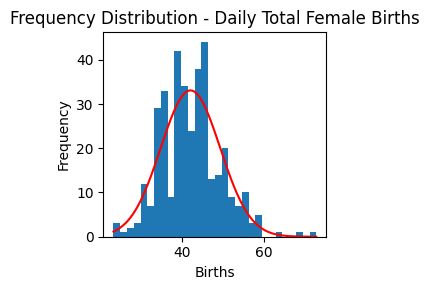

Time Series


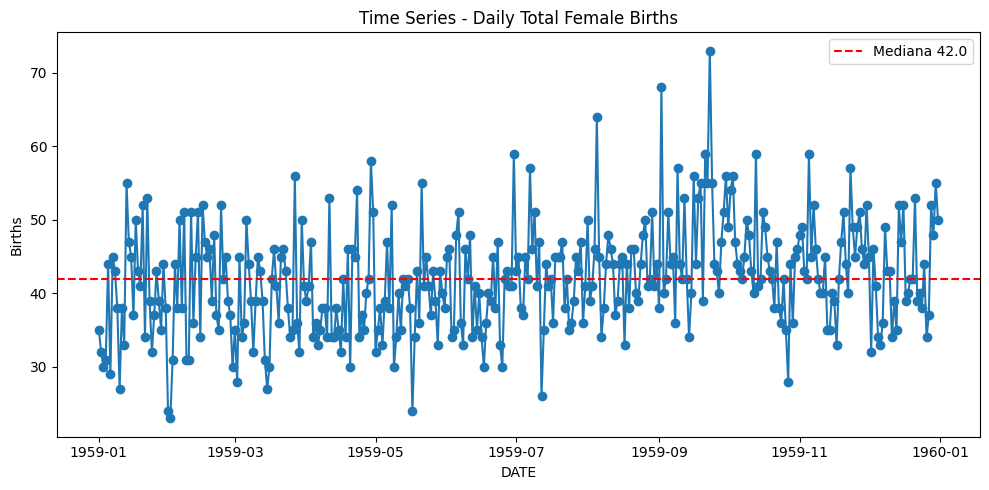

Seasonal Decompose


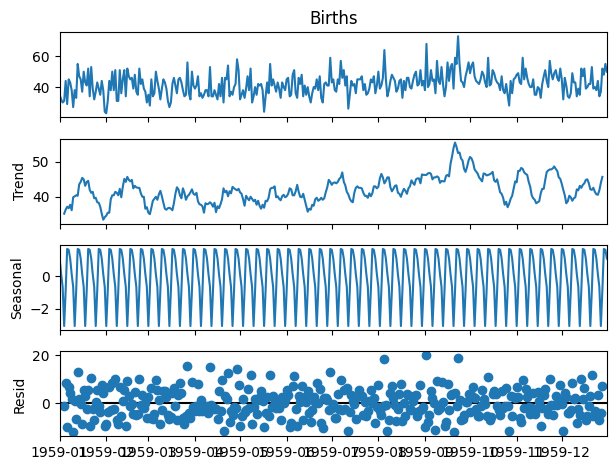

In [12]:
from scripts import analysis_graphs

date = "Date"
value = "Births"
title = "Daily Total Female Births"

analysis_graphs(
    female_births,
    value,
    title
)

### 2. Moving Average

ACF plot


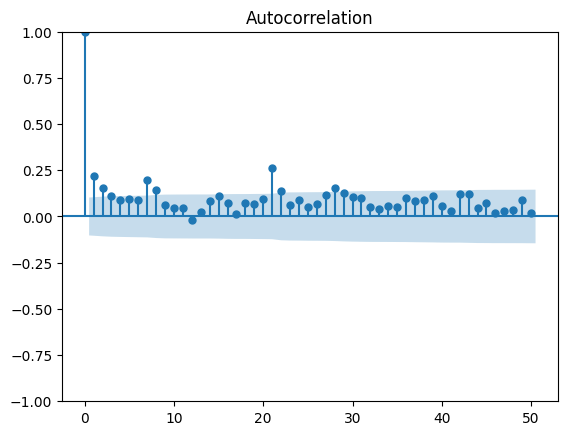

Finding Best Period
Best Lag is 20 with weight of 0.26386845835545036
Moving Average Graph


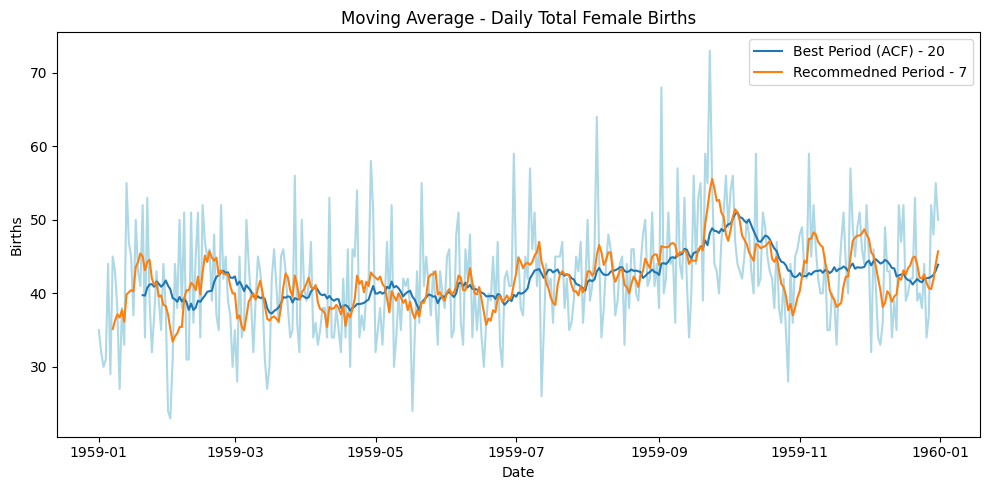

In [13]:
from scripts import moving_average

moving_average(female_births, value, title, 7)

### 5. Modelo SARIMA 

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


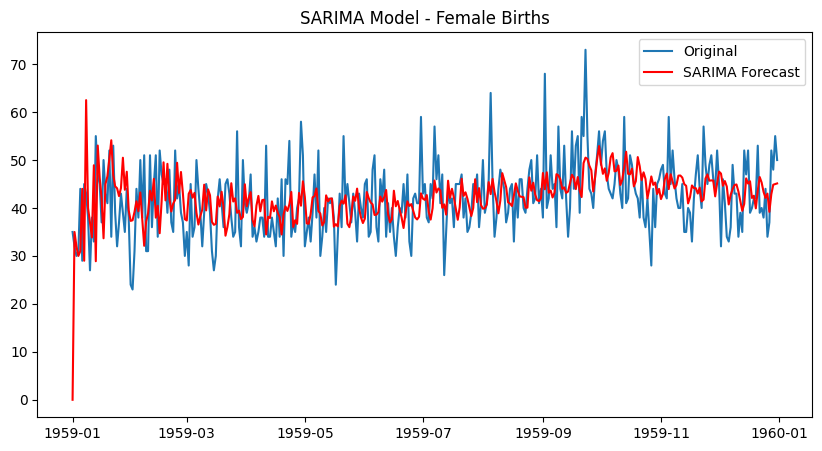

Model Summary:
                                     SARIMAX Results                                     
Dep. Variable:                            Births   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1210.618
Date:                           Fri, 18 Jul 2025   AIC                           2431.235
Time:                                   17:10:54   BIC                           2450.624
Sample:                               01-01-1959   HQIC                          2438.947
                                    - 12-31-1959                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1066      0.065      1.651      0.099      -0.020       0.233
ma.L1         -0.9630      0

In [22]:
from scripts import sarima_model

# Aplicar el modelo SARIMA
sarima_model(female_births.copy(), 'Date', 'Births', order=(1,1,1), seasonal_order=(1,1,1,7), title="Female Births")



### 6. Modelar serie de tiempo con Prophet

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
17:22:17 - cmdstanpy - INFO - Chain [1] start processing
17:22:18 - cmdstanpy - INFO - Chain [1] done processing


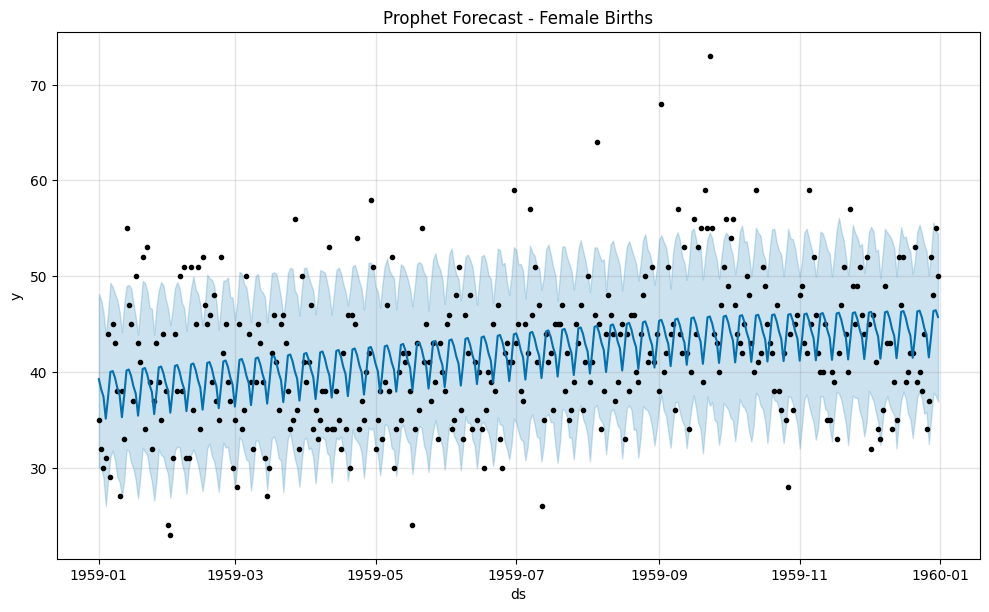

Female Births - Prophet MSE: 46.72, MAE: 5.38


In [23]:
from scripts import apply_prophet


apply_prophet(female_births.copy(), 'Date', 'Births', title="Female Births")
